In [21]:
# Student Name : Abdul Bishar
# Cohort       : 5

<h1> Chef Inc: Case Challenge Part I (Individual Assignment 1)</h1>

After three years serving customers across the San Francisco Bay Area, the executives at Apprentice Chef have come to realize that over 90% of their revenue comes from customers that have been ordering meal sets for 12 months or less. Given this information, they would like to better understand how much revenue to expect from each customer within their first year of orders. Thus, they have hired you on a full-timecontract to analyze their data, develop your top insights, and build a machine learning model to predict revenue over the first year of each customer’s life cycle.


Tasks: 

    1) Develop and understanding of the data and identify patterns
    2) Identify areas of improvement and give actionable recommendations based on analysis
    3) Build and compare regression based predictive models to predict sales revenue
    4) Select Final Model
    

<h2>Data Preperation</h2>

In [41]:
#Importing required packages 

# importing libraries
import pandas as pd                                                   # data science essentials
import matplotlib.pyplot as plt                                       # data visualization
import numpy as np                                                    #scientific computing
import seaborn as sns                                                 # enhanced data visualization
import statsmodels.formula.api as smf                                 # explanatory model 
import sklearn.linear_model                                           #all sk model
from sklearn.model_selection import train_test_split,cross_val_score  #train/test/split
from sklearn.linear_model import LinearRegression                     #Linear Regression
from sklearn.linear_model import Ridge                                #Ridge Regression
from sklearn.linear_model import Lasso                                #Lasso Regression
from sklearn.ensemble import GradientBoostingRegressor                #Gradient Boosting Regressor
from sklearn.neighbors import KNeighborsRegressor                     # KNN for Regression
from sklearn.preprocessing import StandardScaler                      # standard scaler

In [42]:
#Reading in dataset and printing first 5 rows

file = 'Apprentice_Chef_Dataset.xlsx'

chef = pd.read_excel(file)

chef.head(n=5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,...,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,...,4,1,0,90,135.3,3,1,3,13,253


<h2>Data exploration and cleaning </h2>

In [43]:
#exploring data structure 
chef.info()
chef.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
NAME                            1946 non-null object
EMAIL                           1946 non-null object
FIRST_NAME                      1946 non-null object
FAMILY_NAME                     1899 non-null object
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
CANCELLATIONS_BEFORE_NOON       1946 non-null int64
CANCELLATIONS_AFTER_NOON        1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
PC_LOGINS                       1946 non-null int64
MOBILE_LOGINS                   1946 non-null int64
W

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,...,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,...,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,...,2.97,0.36,0.11,35.41,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,...,2.74,0.48,0.32,26.58,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,33.40,0.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,...,1.00,0.00,0.00,10.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,...,2.00,0.00,0.00,30.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,...,4.00,1.00,0.00,60.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,...,19.00,1.00,1.00,90.00,564.20,11.00,3.00,5.00,19.00,1600.00


In [44]:
#47 missing values identified for FAMILY_NAME 
fill = 'Unknown'
chef['FAMILY_NAME'] = chef['FAMILY_NAME'].fillna(fill)


chef.isnull().sum()

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                     0
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
FOLLOWED_RECOMMENDATIONS_PCT    0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

<h1>Feature Enigneering</h1>


<h2>EDA and developing outlier thresholds </h2>

In [47]:

#Imputing missing value on Largest_order_size (imputed 2 by looking at revenue for user and meals ordered)

chef.loc[ : ,'LARGEST_ORDER_SIZE'].replace(0, 2, inplace =True)

#Introducing new variable avg_meal_size

chef['AVG_MEAL_SIZE'] = chef['TOTAL_MEALS_ORDERED'] / chef['LARGEST_ORDER_SIZE']



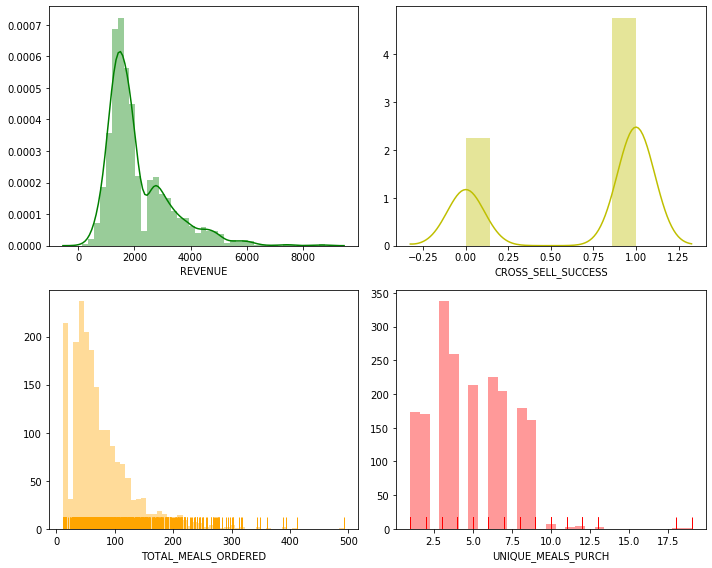

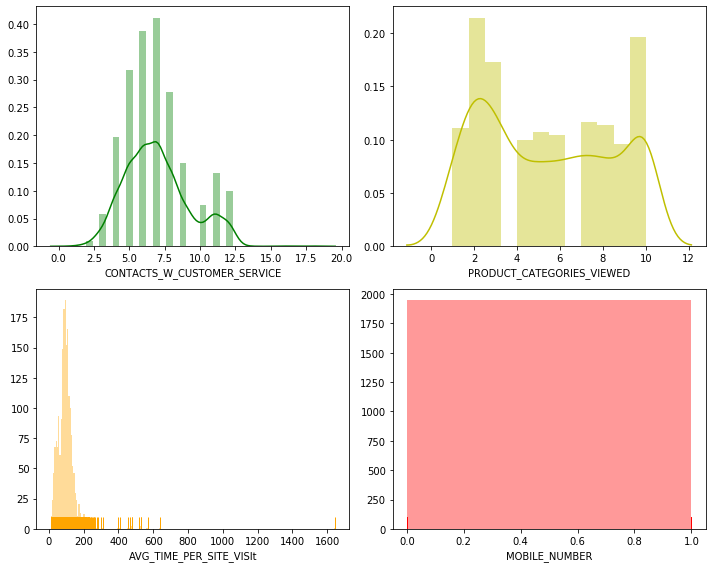

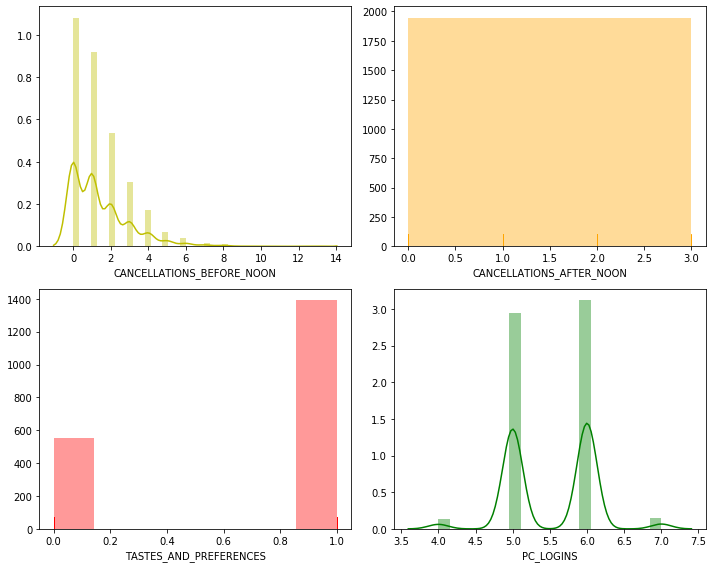

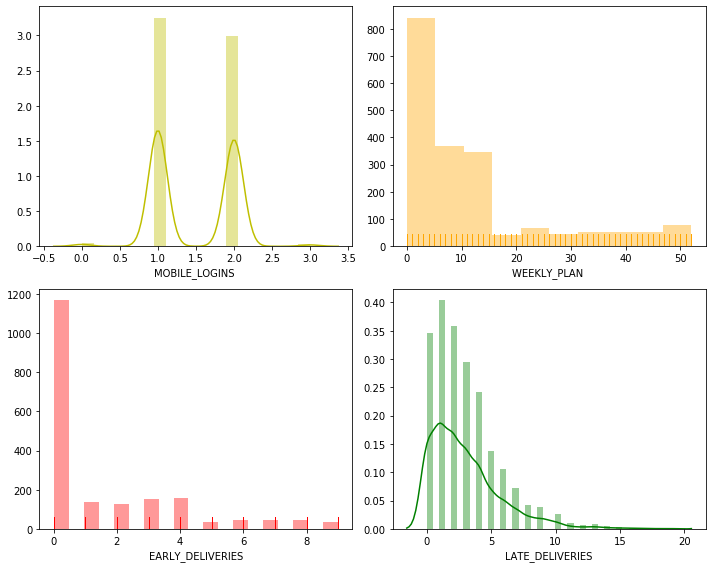

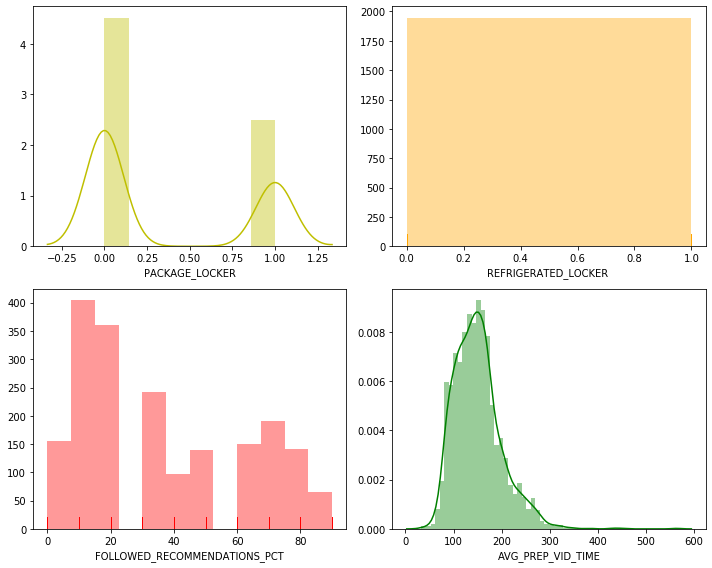

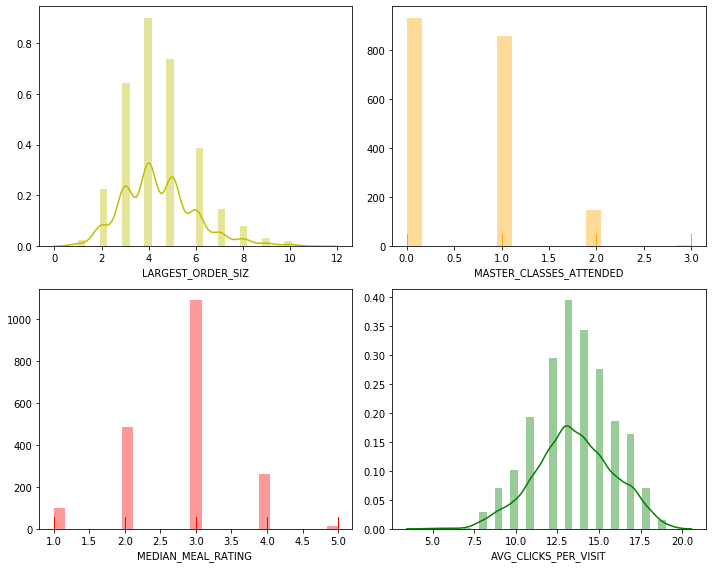

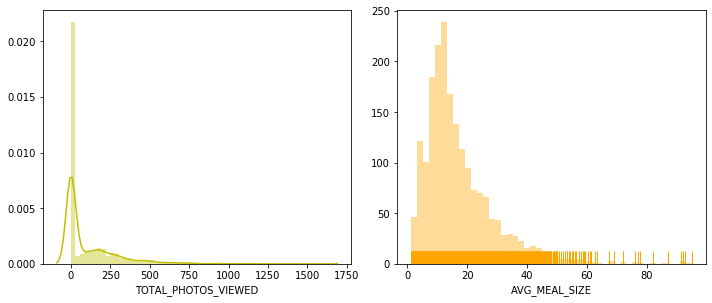

In [27]:
########################
# Visual EDA (Histograms)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['REVENUE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('REVENUE')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['CROSS_SELL_SUCCESS'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################
plt.subplot(2, 2, 4)
sns.distplot(chef['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('UNIQUE_MEALS_PURCH')
plt.tight_layout()
plt.savefig('Housing Data Histograms 1 of 5.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('AVG_TIME_PER_SITE_VISIt')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['MOBILE_NUMBER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MOBILE_NUMBER')
plt.tight_layout()
plt.savefig('Housing Data Histograms 2 of 5.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['CANCELLATIONS_AFTER_NOON'],
             bins  = 1,
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('TASTES_AND_PREFERENCES')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['PC_LOGINS'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PC_LOGINS')
plt.tight_layout()
plt.savefig('Housing Data Histograms 3 of 5.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['MOBILE_LOGINS'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('MOBILE_LOGINS ')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['WEEKLY_PLAN'],
             bins = 10,
             kde  = False,
             rug  = True,
             color = 'orange')
plt.xlabel('WEEKLY_PLAN ')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['EARLY_DELIVERIES'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['LATE_DELIVERIES'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('LATE_DELIVERIES')
plt.tight_layout()
plt.savefig('Housing Data Histograms 4 of 5.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['PACKAGE_LOCKER'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('PACKAGE_LOCKER')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['REFRIGERATED_LOCKER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('REFRIGERATED_LOCKER ')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('AVG_PREP_VID_TIME')
plt.tight_layout()
plt.savefig('Housing Data Histograms 6 of 5.png')
plt.show()


########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('LARGEST_ORDER_SIZ')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('MASTER_CLASSES_ATTENDED')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MEDIAN_MEAL_RATING ')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('AVG_CLICKS_PER_VISIT')
plt.tight_layout()
plt.savefig('Housing Data Histograms 7 of 5.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('TOTAL_PHOTOS_VIEWED')


plt.subplot(2, 2, 2)
sns.distplot(chef['AVG_MEAL_SIZE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('AVG_MEAL_SIZE')


plt.tight_layout()
plt.savefig('Housing Data Histograms 8 of 5.png')
plt.show()


REVENUE


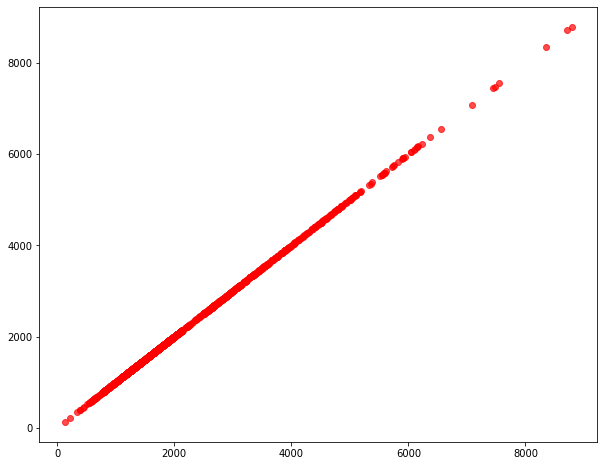

CROSS_SELL_SUCCESS


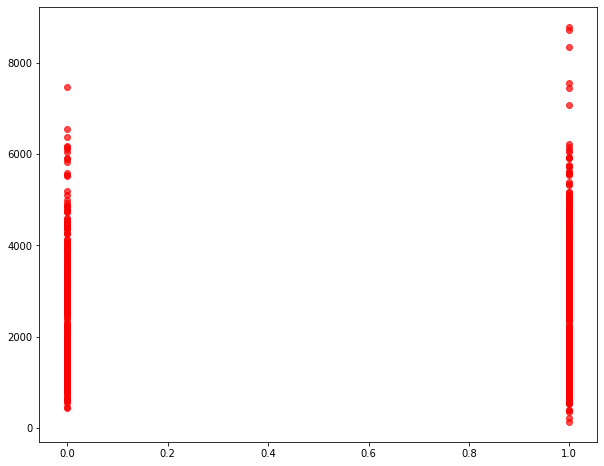

TOTAL_MEALS_ORDERED


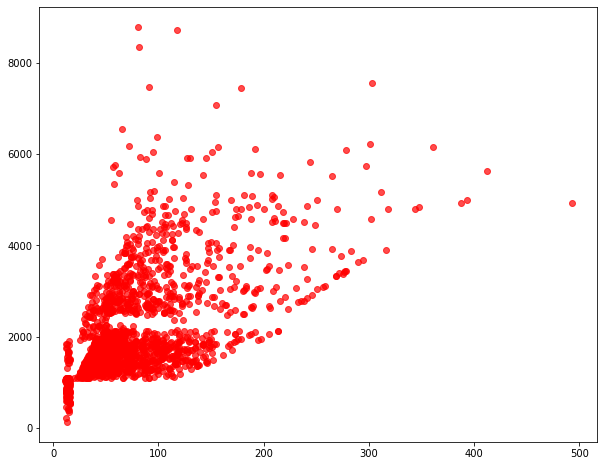

UNIQUE_MEALS_PURCH


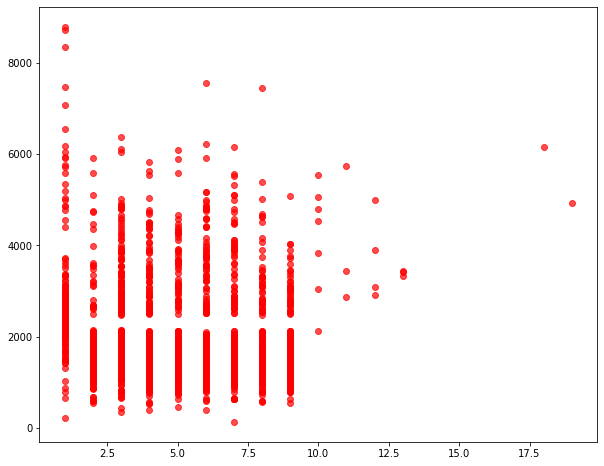

CONTACTS_W_CUSTOMER_SERVICE


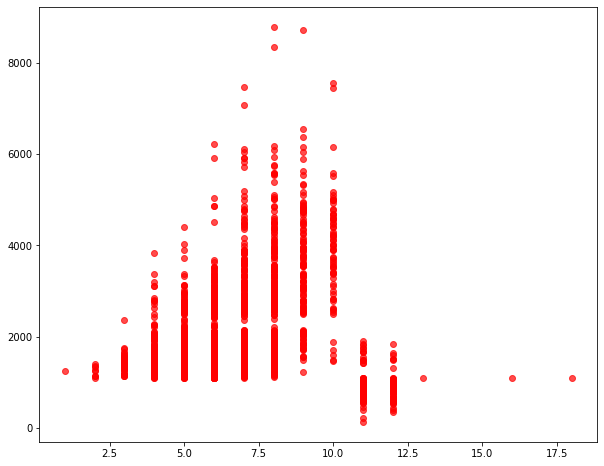

PRODUCT_CATEGORIES_VIEWED


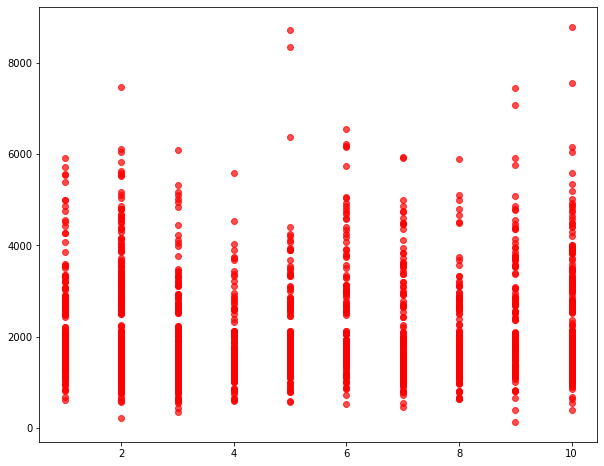

AVG_TIME_PER_SITE_VISIT


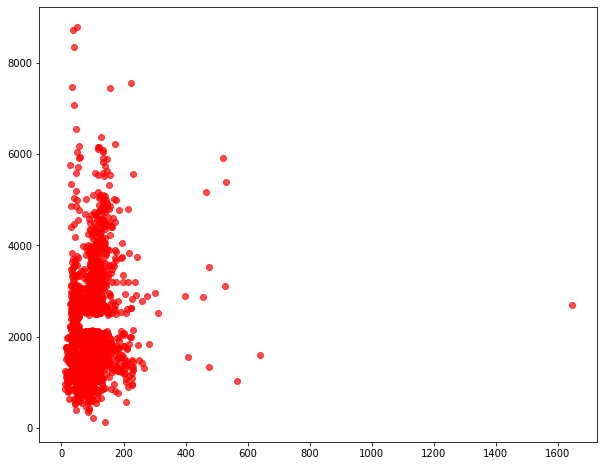

MOBILE_NUMBER


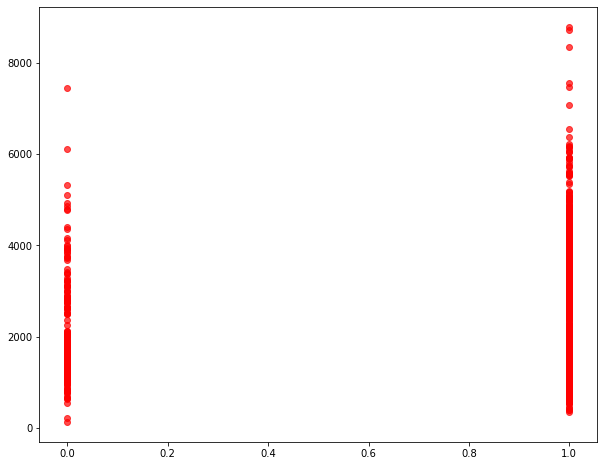

CANCELLATIONS_BEFORE_NOON


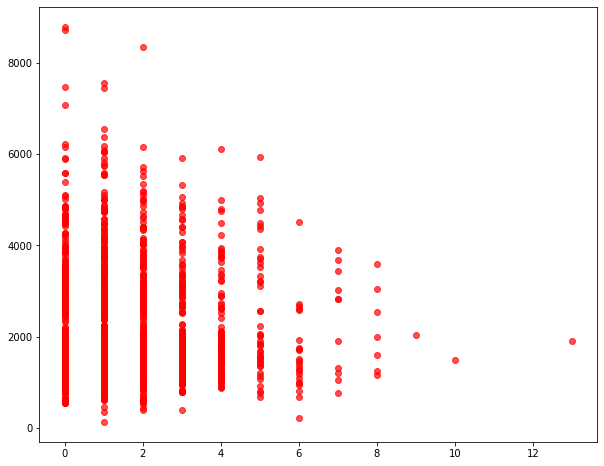

CANCELLATIONS_AFTER_NOON


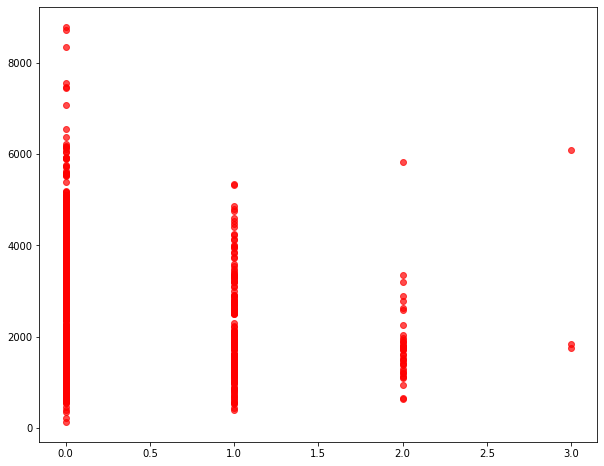

TASTES_AND_PREFERENCES


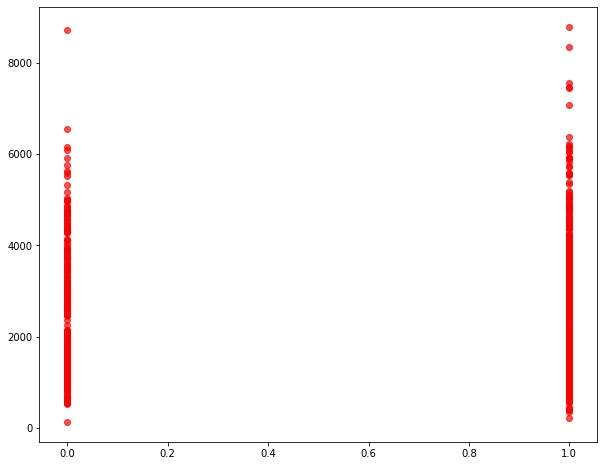

PC_LOGINS


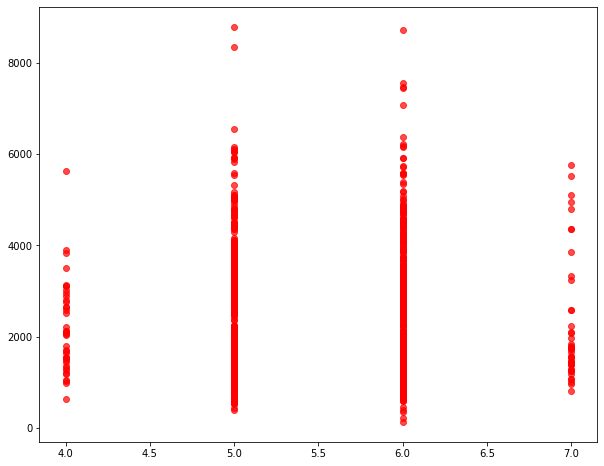

MOBILE_LOGINS


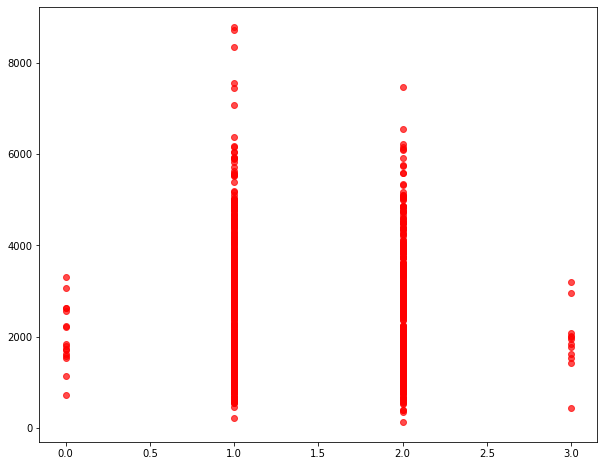

WEEKLY_PLAN


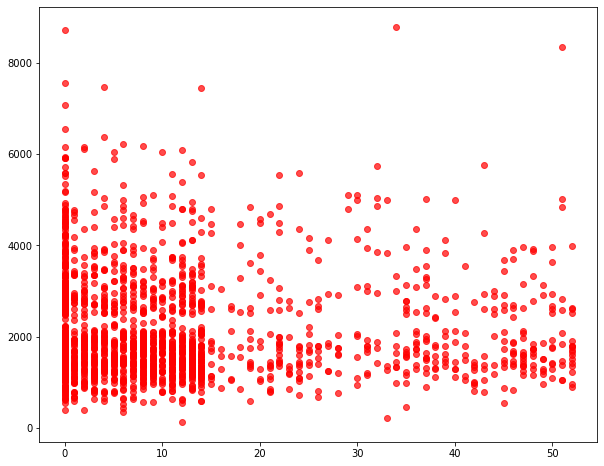

EARLY_DELIVERIES


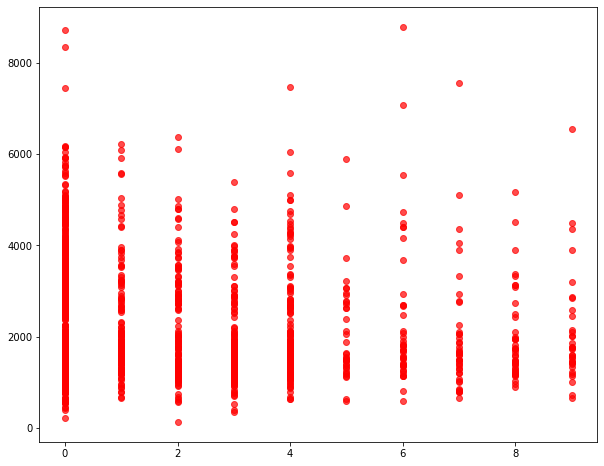

LATE_DELIVERIES


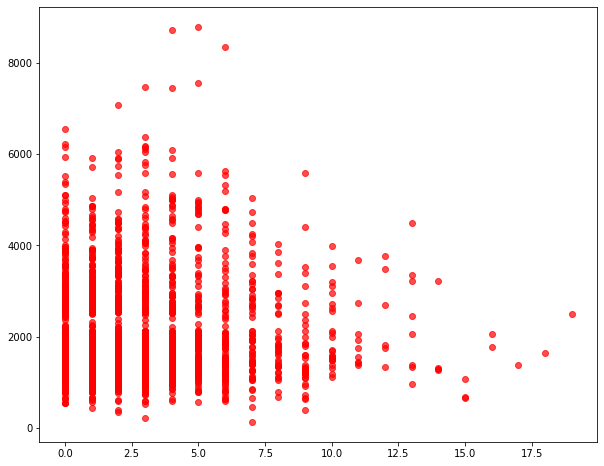

PACKAGE_LOCKER


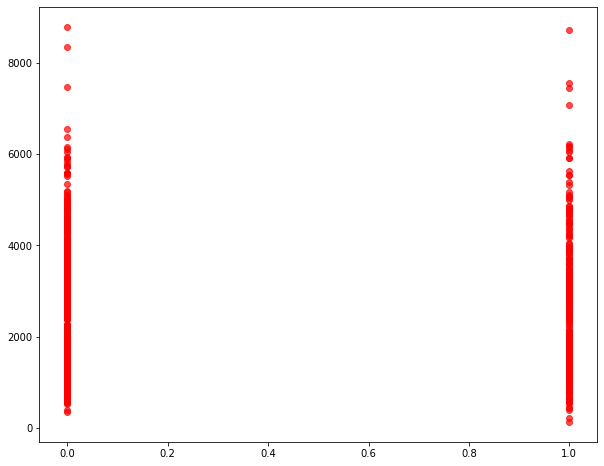

REFRIGERATED_LOCKER


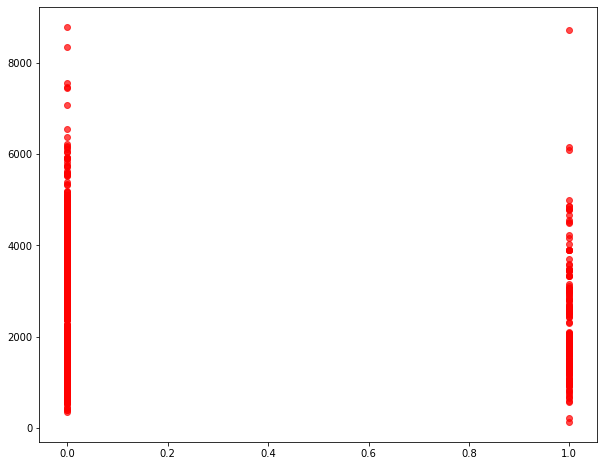

FOLLOWED_RECOMMENDATIONS_PCT


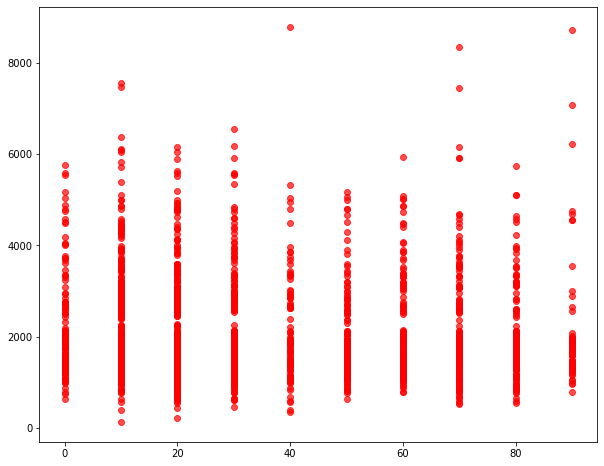

AVG_PREP_VID_TIME


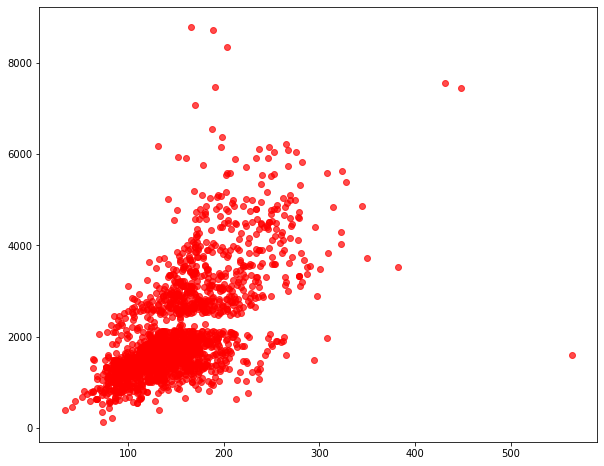

LARGEST_ORDER_SIZE


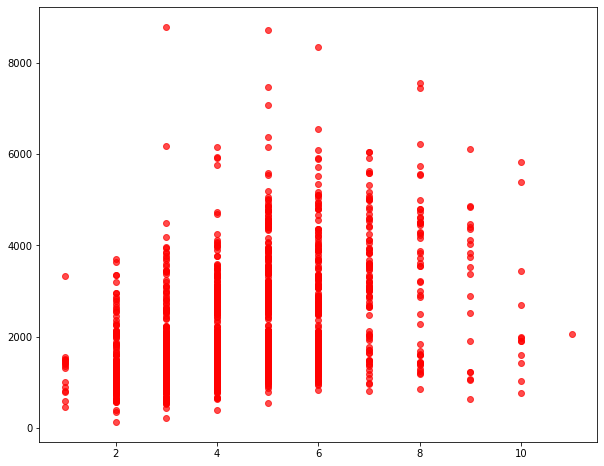

MASTER_CLASSES_ATTENDED


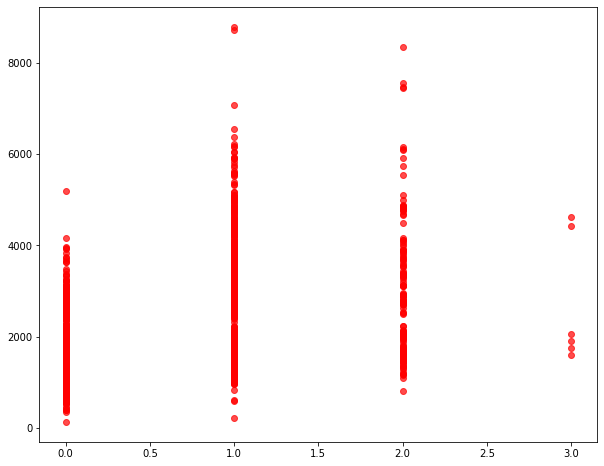

MEDIAN_MEAL_RATING


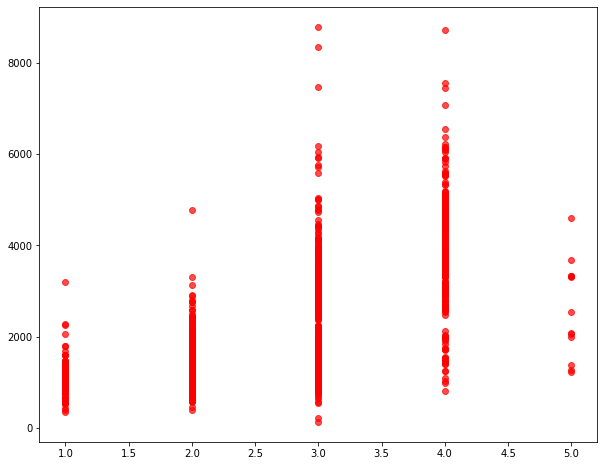

AVG_CLICKS_PER_VISIT


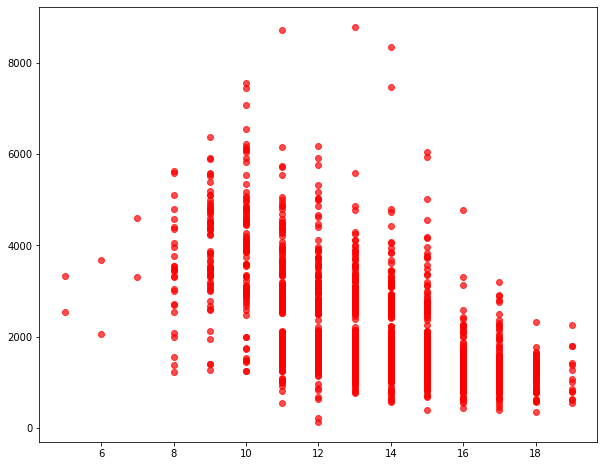

TOTAL_PHOTOS_VIEWED


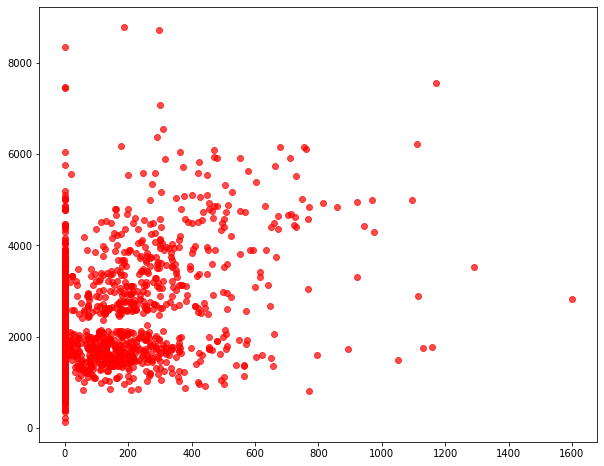

AVG_MEAL_SIZE


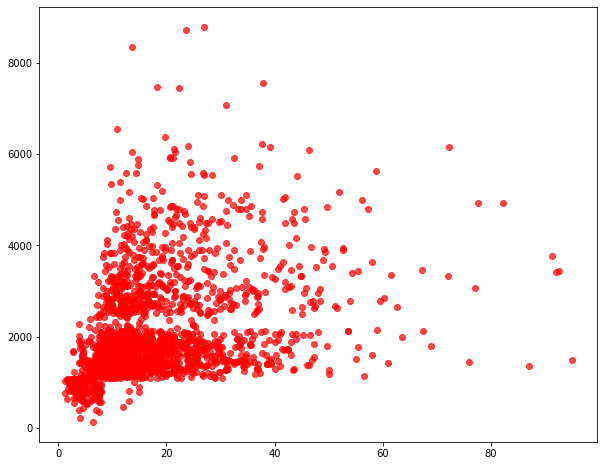

In [28]:
########################
# Visual EDA (scatterplots)
########################

#Removing non numeric columns
numerical_chef = chef.drop(['NAME','FIRST_NAME',
                       'FAMILY_NAME', 'EMAIL'],
                        axis = 1)

# for loop that plots scatterplots with y = REVENUE and x = all variables
for col in numerical_chef:
    
    fig, ax = plt.subplots(figsize = (10, 8))
    
    plt.scatter(x = numerical_chef[col], y = 'REVENUE',
                data = numerical_chef, alpha = 0.7, color= 'r')
    xlabel = print(f'{col}')
    plt.show()


In [29]:
# Outliers thresholds determined based on the histograms and scatterplots
total_meals_ordered_hi        = 175
total_meals_ordered_lo        = 25
unique_meals_purch_hi         = 10
contact_w_customer_service_hi = 10
contact_w_customer_service_lo = 2
avg_time_per_site_visit_hi    = 200
cancel_before_noon_hi         = 5
cancel_after_noon_hi          = 2
pc_log_hi                     = 7
pc_log_lo                     = 3
mobile_log_hi                 = 7
mobile_log_lo                 = 4
weekly_plan_hi                = 15
late_delivery_hi              = 5
avg_prep_vid_time_hi          = 240
avg_prep_vid_time_lo          = 70
largest_order_size_hi         = 8
master_class_attended_hi      = 2
avg_click_per_visit_lo        = 7
total_photos_viewed_hi        = 300
avg_meal_size_hi              = 40



#Outlier thresholds

#Total Meals Ordered 
chef['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = chef.loc[0:,'out_TOTAL_MEALS_ORDERED'][chef['TOTAL_MEALS_ORDERED'] 
                                                      > total_meals_ordered_hi  ]
condition_lo = chef.loc[0:,'out_TOTAL_MEALS_ORDERED'][chef['TOTAL_MEALS_ORDERED'] 
                                                      < total_meals_ordered_lo ]

chef['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)
chef['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_lo,
                                        value      = 1,
                                        inplace    = True)

# Unique Meals Purchased
chef['out_UNIQUE_MEALS_PURCH']  = 0
condition_hi = chef.loc[0:,'out_UNIQUE_MEALS_PURCH'][chef['UNIQUE_MEALS_PURCH'] 
                                                     > unique_meals_purch_hi]

chef['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                       value      = 1,
                                       inplace    = True)


# CONTACTS_W_CUSTOMER_SERVICE
chef['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = chef.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][chef['CONTACTS_W_CUSTOMER_SERVICE'] 
                                                              > contact_w_customer_service_hi]
condition_lo = chef.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][chef['CONTACTS_W_CUSTOMER_SERVICE'] 
                                                              < contact_w_customer_service_lo]

chef['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                                value      = 1,
                                                inplace    = True)
chef['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo,
                                                value      = 1,
                                                inplace    = True)


# AVG TIME PER SITE VISIT
chef['out_AVG_TIME_PER_SITE_VISIT']  = 0
condition_hi = chef.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][chef['AVG_TIME_PER_SITE_VISIT'] 
                                                          > avg_time_per_site_visit_hi ]

chef['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                            value      = 1,
                                            inplace    = True)

# CANCELLATIONS_BEFORE_NOON
chef['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = chef.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][chef['CANCELLATIONS_BEFORE_NOON'] 
                                                            > cancel_before_noon_hi]

chef['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                              value      = 1,
                                              inplace    = True)

# CANCELLATIONS_AFTER_NOON
chef['out_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = chef.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][chef['CANCELLATIONS_AFTER_NOON'] 
                                                           > cancel_after_noon_hi ]

chef['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                             value      = 1,
                                             inplace    = True)

# PC_LOGINS
chef['out_PC_LOGINS'] = 0
condition_hi = chef.loc[0:,'out_PC_LOGINS'][chef['PC_LOGINS'] 
                                            > pc_log_hi ]
condition_lo = chef.loc[0:,'out_PC_LOGINS'][chef['PC_LOGINS'] 
                                                < pc_log_lo ]

chef['out_PC_LOGINS'].replace(to_replace = condition_hi,
                              value      = 1,
                              inplace    = True)
chef['out_PC_LOGINS'].replace(to_replace = condition_lo,
                             value      = 1,
                             inplace    = True)


# MOBILE_LOGINS
chef['out_MOBILE_LOGINS'] = 0
condition_hi = chef.loc[0:,'out_MOBILE_LOGINS'][chef['MOBILE_LOGINS'] 
                                                > mobile_log_hi ]
condition_lo = chef.loc[0:,'out_MOBILE_LOGINS'][chef['MOBILE_LOGINS'] 
                                                < mobile_log_lo ]

chef['out_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                  value      = 1,
                                  inplace    = True)
chef['out_MOBILE_LOGINS'].replace(to_replace = condition_lo,
                                  value      = 1,
                                  inplace    = True)

# WEEKLY_PLAN
chef['out_WEEKLY_PLAN'] = 0
condition_hi = chef.loc[0:,'out_WEEKLY_PLAN'][chef['WEEKLY_PLAN'] 
                                              > weekly_plan_hi]

chef['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# LATE_DELIVERIES
chef['out_LATE_DELIVERIES'] = 0
condition_hi = chef.loc[0:,'out_LATE_DELIVERIES'][chef['LATE_DELIVERIES'] 
                                                  > late_delivery_hi]

chef['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# AVG_PREP_VID_TIME
chef['out_AVG_PREP_VID_TIME'] = 0
condition_hi = chef.loc[0:,'out_AVG_PREP_VID_TIME'][chef['AVG_PREP_VID_TIME'] 
                                                    > avg_prep_vid_time_hi]
condition_lo = chef.loc[0:,'out_AVG_PREP_VID_TIME'][chef['AVG_PREP_VID_TIME'] 
                                                    < avg_prep_vid_time_lo]

chef['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                      value      = 1,
                                      inplace    = True)
chef['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_lo,
                                      value      = 1,
                                      inplace    = True)

# LARGEST_ORDER_SIZE
chef['out_LARGEST_ORDER_SIZE'] = 0
condition_hi = chef.loc[0:,'out_LARGEST_ORDER_SIZE'][chef['LARGEST_ORDER_SIZE'] 
                                                     > largest_order_size_hi]

chef['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                       value      = 1,
                                       inplace    = True)

# MASTER_CLASSES_ATTENDED
chef['out_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = chef.loc[0:,'out_MASTER_CLASSES_ATTENDED'][chef['MASTER_CLASSES_ATTENDED'] 
                                                          > master_class_attended_hi]

chef['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                            value      = 1,
                                            inplace    = True)

# AVG_CLICKS_PER_VISIT
chef['out_AVG_CLICKS_PER_VISIT'] = 0
condition_lo = chef.loc[0:,'out_AVG_CLICKS_PER_VISIT'][chef['AVG_CLICKS_PER_VISIT'] 
                                                       < avg_click_per_visit_lo]

chef['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                         value      = 1,
                                         inplace    = True)

# TOTAL_PHOTOS_VIEWED
chef['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = chef.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][chef['TOTAL_PHOTOS_VIEWED'] 
                                                      > total_photos_viewed_hi]

chef['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)


# AVG_MEAL_SIZE
chef['out_AVG_MEAL_SIZE'] = 0
condition_hi = chef.loc[0:,'out_AVG_MEAL_SIZE'][chef['AVG_MEAL_SIZE'] 
                                                     > avg_meal_size_hi]

chef['out_AVG_MEAL_SIZE'].replace(to_replace = condition_hi,
                                       value      = 1,
                                       inplace    = True)





<h2>Correlation </h2>

In [30]:
# Creating (Pearson) correlation matrix
chef_corr = chef.corr().round(2)



# Heatmap gives a good initial overview of all correlations
#fig, ax = plt.subplots(figsize  = (20,20))

#sns.heatmap(chef_corr, cmap = 'coolwarm', square = True, annot = True,linecolor = 'black', linewidths = 0.5)

#plt.show()

Note: Based on the case and the heat map above (remove hashtags to view), I was inspired to focus on the customer service problem and noticed two correlations I would like to investigate

1) All correlations between REVENUE and other variables

2) high negative correlation (-0.86) between MEDIAN_MEAL_RATING and AVG_CLICK_PER_VISIT

**decided to ignore high correlation (0.8) between LARGEST_ORDER_SIZE and AVG_PREP_VID_TIME because i believe the insight is quite obvious 

In [31]:

#1 Looking at correlation with REVENUE
print(chef_corr['REVENUE'].sort_values(ascending=False))



#2 Finding correlation for MEDIAN_MEAL_RATING 
print(chef_corr['MEDIAN_MEAL_RATING'].sort_values(ascending=False))
    
    
    
# Scatterplot showing the relationship between median rating and avg click per visit
#fig, ax = plt.subplots(figsize = (10, 8))

#plt.scatter(x = 'AVG_CLICKS_PER_VISIT', y = 'MEDIAN_MEAL_RATING',
                #data = numerical_chef, alpha = 0.7,  color= 'r')
#xlabel = print("'AVG_CLICKS_PER_VISIT")
#plt.show()
    

REVENUE                            1.00
AVG_PREP_VID_TIME                  0.64
MEDIAN_MEAL_RATING                 0.61
TOTAL_MEALS_ORDERED                0.60
TOTAL_PHOTOS_VIEWED                0.47
MASTER_CLASSES_ATTENDED            0.45
LARGEST_ORDER_SIZE                 0.43
out_TOTAL_PHOTOS_VIEWED            0.39
AVG_MEAL_SIZE                      0.36
out_AVG_PREP_VID_TIME              0.33
out_AVG_MEAL_SIZE                  0.18
AVG_TIME_PER_SITE_VISIT            0.14
out_UNIQUE_MEALS_PURCH             0.13
CONTACTS_W_CUSTOMER_SERVICE        0.10
out_LARGEST_ORDER_SIZE             0.09
out_CANCELLATIONS_AFTER_NOON       0.04
MOBILE_NUMBER                      0.03
out_MASTER_CLASSES_ATTENDED        0.03
PRODUCT_CATEGORIES_VIEWED          0.03
out_AVG_CLICKS_PER_VISIT           0.03
out_WEEKLY_PLAN                    0.03
out_AVG_TIME_PER_SITE_VISIT        0.03
PC_LOGINS                          0.02
WEEKLY_PLAN                        0.01
TASTES_AND_PREFERENCES             0.01


<h2> Email </h2>

This next cell focuses on splitting emails into 3 seperate categories, however the three features created, peronal,professional and junk were not used in the final model

In [32]:
# Dummie variables from the email domain.
# Converting dataset to a dataFrame in order to use .iterrows()
chef_email       = pd.DataFrame(chef['EMAIL'])

placeholder_lst  = []

for index, col in chef_email.iterrows():
    split_email  = chef_email.loc[index, 'EMAIL'].split(sep = '@')
    
    placeholder_lst.append(split_email)
    
email_df         = pd.DataFrame(placeholder_lst)
email_df.columns = ['name', 'domain']


# Domain groups
personal_email     = ['@gmail.com', '@yahoo.com','@protonmail.com']
professional_email = ['@mmm.com', '@amex.com','@apple.com',
                      '@boeing.com','@caterpillar.com',
                      '@chevron.com','@cisco.com','@cocacola.com',
                      '@disney.com','@dupont.com','@exxon.com',
                      '@ge.org','@goldmansacs.com','@homedepot.com',
                      '@ibm.com','@intel.com','@jnj.com',
                      '@jpmorgan.com','@mcdonalds.com','@merck.com',
                      '@microsoft.com','@nike.com','@pfizer.com',
                      '@pg.com','@travelers.com','@unitedtech.com',
                      '@unitedhealth.com','@verizon.com','@visa.com',
                      '@walmart.com']
junk_email          = ['@me.com', '@aol.com', '@hotmail.com', '@live.com',
                       '@msn.com','@passport.com']


# For loop categorising the different email domains
placeholder_lst = []

for domain in email_df['domain']:
    
    if '@' + domain in personal_email:
        placeholder_lst.append('personal')
    elif '@' + domain in professional_email:
        placeholder_lst.append('professional')
    else:
        placeholder_lst.append('junk')
        
# make the columns into a series to append it to original dataset        
email_df['DOMAIN_GROUP'] = pd.Series(placeholder_lst)

# Concatenate the email domains as a new column in the chef DataFrame 
chef['DOMAIN'] = email_df['DOMAIN_GROUP']

# Get dummies from the domain variable and drop the original column
one_hot_DOMAIN = pd.get_dummies(chef['DOMAIN'])

# Remove the old and add the 3 new columns
chef           = chef.drop('DOMAIN', axis = 1)
chef           = chef.join([one_hot_DOMAIN])



numerical_chef = chef.drop(['REVENUE', 'NAME', 'EMAIL', 
                       'FIRST_NAME','FAMILY_NAME'], axis = 1)

# For loop to print the numeric variable in the right format for Statmodel
for col in numerical_chef:
    print(f"chef['{col}'] +")

chef['CROSS_SELL_SUCCESS'] +
chef['TOTAL_MEALS_ORDERED'] +
chef['UNIQUE_MEALS_PURCH'] +
chef['CONTACTS_W_CUSTOMER_SERVICE'] +
chef['PRODUCT_CATEGORIES_VIEWED'] +
chef['AVG_TIME_PER_SITE_VISIT'] +
chef['MOBILE_NUMBER'] +
chef['CANCELLATIONS_BEFORE_NOON'] +
chef['CANCELLATIONS_AFTER_NOON'] +
chef['TASTES_AND_PREFERENCES'] +
chef['PC_LOGINS'] +
chef['MOBILE_LOGINS'] +
chef['WEEKLY_PLAN'] +
chef['EARLY_DELIVERIES'] +
chef['LATE_DELIVERIES'] +
chef['PACKAGE_LOCKER'] +
chef['REFRIGERATED_LOCKER'] +
chef['FOLLOWED_RECOMMENDATIONS_PCT'] +
chef['AVG_PREP_VID_TIME'] +
chef['LARGEST_ORDER_SIZE'] +
chef['MASTER_CLASSES_ATTENDED'] +
chef['MEDIAN_MEAL_RATING'] +
chef['AVG_CLICKS_PER_VISIT'] +
chef['TOTAL_PHOTOS_VIEWED'] +
chef['AVG_MEAL_SIZE'] +
chef['out_TOTAL_MEALS_ORDERED'] +
chef['out_UNIQUE_MEALS_PURCH'] +
chef['out_CONTACTS_W_CUSTOMER_SERVICE'] +
chef['out_AVG_TIME_PER_SITE_VISIT'] +
chef['out_CANCELLATIONS_BEFORE_NOON'] +
chef['out_CANCELLATIONS_AFTER_NOON'] +
chef['out_PC_LOGINS'] +
chef['ou

<h1>Variable Selection</h1>


Note: Method used was to include all variables in the model and then remove variables based on p-values


List of removed variables = 

'PRODUCT_CATEGORIES_VIEWED' 

'AVG_TIME_PER_SITE_VISIT' 

'MOBILE_NUMBER' 

'CANCELLATIONS_BEFORE_NOON' 

'CANCELLATIONS_AFTER_NOON' 

TASTES_AND_PREFERENCES'

'PC_LOGINS' 

'MOBILE_LOGINS' 

'WEEKLY_PLAN' 

'REFRIGERATED_LOCKER' 

'FOLLOWED_RECOMMENDATIONS_PCT' 

'PACKAGE_LOCKER'

'out_CANCELLATIONS_BEFORE_NOON' 

'out_AVG_TIME_PER_SITE_VISIT' 

'LATE_DELIVERIES' 

'out_CANCELLATIONS_AFTER_NOON'

'out_WEEKLY_PLAN' 

'out_LARGEST_ORDER_SIZE'

'out_AVG_PRICE_PER_MEAL'

'EARLY_DELIVERIES' 

In [33]:

# Statsmodel to build a linear regression with p-values
lm_chef = smf.ols(formula = """chef['REVENUE']~
                                      chef['TOTAL_MEALS_ORDERED'] +
                                      chef['UNIQUE_MEALS_PURCH'] +
                                      chef['CONTACTS_W_CUSTOMER_SERVICE'] +
                                      chef['AVG_PREP_VID_TIME'] +
                                      chef['LARGEST_ORDER_SIZE'] +
                                      chef['MASTER_CLASSES_ATTENDED'] +
                                      chef['MEDIAN_MEAL_RATING'] +
                                      chef['AVG_CLICKS_PER_VISIT'] +
                                      chef['TOTAL_PHOTOS_VIEWED'] +
                                      chef['out_TOTAL_MEALS_ORDERED']+
                                      chef['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                      chef['out_PC_LOGINS'] +
                                      chef['out_AVG_PREP_VID_TIME'] +
                                      chef['out_MASTER_CLASSES_ATTENDED'] +
                                      chef['out_AVG_CLICKS_PER_VISIT'] +
                                      chef['out_TOTAL_PHOTOS_VIEWED'] +
                                      chef['AVG_MEAL_SIZE']+
                                      chef['out_AVG_MEAL_SIZE']
                                      """, data = chef)



result_fitted_chef = lm_chef.fit()

result_fitted_chef.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        chef['REVENUE']   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     227.4
Date:                Sat, 07 Mar 2020   Prob (F-statistic):               0.00
Time:                        18:33:11   Log-Likelihood:                -15385.
No. Observations:                1946   AIC:                         3.081e+04
Df Residuals:                    1928   BIC:                         3.091e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 161.1141    292.522      0.551      0.582    -412.578     734.807
chef['TOTAL_MEALS_ORDERED']                 6.2428      0.907      6.881      0.000       4.463       8.022
chef['UNIQUE_MEALS_PURCH']                -65.3484      6.096    -10.720      0.000     -77.304     -53.393
chef['CONTACTS_W_CUSTOMER_SERVICE']       131.7393     10.529     12.512      0.000     111.090     152.388
chef['AVG_PREP_VID_TIME']                   7.9671      0.656     12.149      0.000       6.681       9.253
chef['LARGEST_ORDER_SIZE']               -128.1357     21.739     -5.894      0.000    -170.771     -85.500
chef['MASTER_CLASSES_ATTENDED']           162.7010     27.722      5.869      0.000     108.333     217.069
chef['MEDIAN_MEAL_RATING']                245.7718     41.446      5.930      0.000     164.489     327.055
chef['AVG_CLICKS_PER_VISIT']              -24.7103     12.618     -1.958      0.050     -49.456       0.035
chef['TOTAL_PHOTOS_VIEWED']                 0.4273      0.146      2.937      0.003       0.142       0.713
chef['out_TOTAL_MEALS_ORDERED']           218.7537     99.559      2.197      0.028      23.498     414.009
chef['out_CONTACTS_W_CUSTOMER_SERVICE'] -1221.7407    136.844     -8.928      0.000   -1490.118    -953.363
chef['out_PC_LOGINS']                    3.008e-13   6.75e-14      4.457      0.000    1.68e-13    4.33e-13
chef['out_AVG_PREP_VID_TIME']             196.0500     72.163      2.717      0.007      54.524     337.576
chef['out_MASTER_CLASSES_ATTENDED']     -1006.6834    278.559     -3.614      0.000   -1552.991    -460.376
chef['out_AVG_CLICKS_PER_VISIT']         -979.5239    336.656     -2.910      0.004   -1639.772    -319.275
chef['out_TOTAL_PHOTOS_VIEWED']           139.9567     77.554      1.805      0.071     -12.142     292.056
chef['AVG_MEAL_SIZE']                      -9.3743      3.865     -2.426      0.015     -16.954      -1.795
chef['out_AVG_MEAL_SIZE']                -160.0047     99.541     -1.607      0.108    -355.224      35.215
==============================================================================
Omnibus:                      792.840   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9414.104
Skew:                           1.577   Prob(JB):                         0.00
Kurtosis:                      13.303   Cond. No.                     4.75e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.36e-32. This might indicate that there are
strong multicollinearity problems or that the design m

In [34]:
x_variables = [ 'TOTAL_MEALS_ORDERED', 
                'UNIQUE_MEALS_PURCH',
                'CONTACTS_W_CUSTOMER_SERVICE',
                'AVG_PREP_VID_TIME',
                'LARGEST_ORDER_SIZE',
                'MASTER_CLASSES_ATTENDED',
                'MEDIAN_MEAL_RATING',
                'AVG_CLICKS_PER_VISIT',
                'TOTAL_PHOTOS_VIEWED',
                'out_TOTAL_MEALS_ORDERED',
                'out_CONTACTS_W_CUSTOMER_SERVICE',
                'out_PC_LOGINS',
                'out_AVG_PREP_VID_TIME',
                'out_MASTER_CLASSES_ATTENDED',
                'out_AVG_CLICKS_PER_VISIT',
                'out_TOTAL_PHOTOS_VIEWED',
                'AVG_MEAL_SIZE',
                'out_AVG_MEAL_SIZE',]


# preparing response variable
chef_target = chef.loc[:, 'REVENUE']

#using log as target to normalize the data
chef_target=np.log(chef_target)

#preparing explanatory variables
chef_explanatory = chef.loc[ : , x_variables]


# preparing training and testing sets (Training = 75% , Testing = 25%)
X_train, X_test, y_train, y_test = train_test_split(
            chef_explanatory,
            chef_target,
            test_size = 0.25,
            random_state = 222)


<h1> Modelling </h1>

Models used:

1) Linear Regression

2) Ridge

3) Lasso

4) Gradient Boosting

5) K-Nearest Neighbor

In [35]:
############################
##### LinearRegression ######
############################

# INSTANTIATING model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)


# saving scoring data for future use
lr_train_score = lr.score(X_train, y_train).round(4)
lr_test_score = lr.score(X_test, y_test).round(4)


############################
######### Ridge ############
############################

# INSTANTIATING a model object
ridge_model = sklearn.linear_model.Ridge()

# FITTING the training data
ridge_fit  = ridge_model.fit(X_train, y_train)

# PREDICTING on new data
ridge_pred = ridge_fit.predict(X_test)

# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)

############################
######### lasso ############
############################

# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso() 

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_test)

# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(4)
lasso_test_score  = lasso_model.score(X_test, y_test).round(4)



##############################################################
### ARD MODEL WAS USED BUT NEEDED TO BE SUPRESSED ############
##############################################################

# INSTANTIATING a model object
#ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
#ard_fit = ard_model.fit(X_train, y_train)


# PREDICTING on new data
#ard_pred = ard_fit.predict(X_test)


#print('Training Score:', ard_model.score(X_train, y_train).round(4))
#print('Testing Score:',  ard_model.score(X_test, y_test).round(4))

# saving scoring data for future use
#ard_train_score =  ard_model.score(X_train, y_train).round(4)
#ard_test_score  = ard_model.score(X_test, y_test).round(4)


#Training Score: 0.8257
#Testing Score: 0.8118


############################
###### Gradient Boost ######
############################

# INSTANTIATING a model object
gbt = GradientBoostingRegressor(random_state=222, 
                                learning_rate = 0.1 ,
                                n_estimators =110)

# FITTING the training data
gbt_model = gbt.fit(X_train,y_train)


# PREDICTING on new data
gbt_pred = gbt.predict(X_test)


# saving scoring data for future use
gbt_train_score = cross_val_score(gbt_model,
                             X_train,
                             y_train,
                             scoring = 'r2',
                             cv=5,
                             n_jobs =-1).mean()

gbt_test_score = cross_val_score(gbt_model,
                             X_test,
                             y_test,
                             scoring = 'r2',
                             cv=5,
                             n_jobs =-1).mean()

############################
########### KNN ############
############################

# INSTANTIATING a model object
knr = KNeighborsRegressor()

# FITTING the training data
knr_model = knr.fit(X_train,y_train)


# PREDICTING on new data
knr_pred = knr.predict(X_test)

# saving scoring data for future use
knr_train_score = knr_model.score(X_train,y_train).round(4)
knr_test_score  = knr_model.score(X_test,y_test).round(4)



############################
###Comparing all Results ###
############################


# Comparison table

print(f"""
Model      Train Score      Test Score
-----      -----------      --------- -
OLS        {lr_train_score}             {lr_test_score}
Ridge      {ridge_train_score}          {ridge_test_score}
Lasso      {lasso_train_score}          {lasso_test_score}
Gboost     {gbt_train_score.round(4)}   ->    {gbt_test_score.round(4)}
KNN        {knr_train_score}            {knr_test_score}
""")

print(f'The best model is Gradient Boosting Regressor: {gbt_test_score}')



Model      Train Score      Test Score
-----      -----------      --------- -
OLS        0.7331             0.6974
Ridge      0.7329          0.698
Lasso      0.548          0.5241
Gboost     0.8313   ->    0.7964
KNN        0.7408            0.5805

The best model is Gradient Boosting Regressor: 0.7964193630538963


<h2> Hyper perameter tuning </h2>

This next cell was used to tune the paramaters for the Gradient model boost regressor to see if fine tuning can push the r^2 even higher

In [36]:
#intial guesses for learning rate

learning_rate = [0.05,0.08,0.09,0.1,0.13,0.15,0.2]

#for loop to test all guesses

for eta in learning_rate:
# INSTANTIATING a model object
    gbt_model = sklearn.ensemble.GradientBoostingRegressor(learning_rate = eta
                                                         )
    # FITTING the training data
    gbt_fit = gbt_model.fit(X_train,y_train)


    # PREDICTING on new data
    gbt_pred = gbt_model.predict(X_test)


    # saving scoring data for future use
    gbt_train_score = cross_val_score(gbt_model,
                                 X_train,
                                 y_train,
                                 scoring = 'r2',
                                 cv=10,
                                 n_jobs =-1).mean()

    gbt_test_score = cross_val_score(gbt_model,
                                 X_test,
                                 y_test,
                                 scoring = 'r2',
                                 cv=10,
                                 n_jobs =-1).mean()

    print(str(eta)+ ' : ' + str(gbt_train_score))
    print(str(eta) + ' : '+ str(gbt_test_score))
    
    
    
    
    
#intial guesses for n_estimators
    
n_estimators = [80,90,100,110,120,130]


#for loop to test all guesses

for abdul in n_estimators:
# INSTANTIATING a model object
    gbt_model = sklearn.ensemble.GradientBoostingRegressor(learning_rate = 0.1, n_estimators = abdul
                                                         )
    # FITTING the training data
    gbt_fit = gbt_model.fit(X_train,y_train)


    # PREDICTING on new data
    gbt_pred = gbt_model.predict(X_test)


    # saving scoring data for future use
    gbt_train_score = cross_val_score(gbt_model,
                                 X_train,
                                 y_train,
                                 scoring = 'r2',
                                 cv=10,
                                 n_jobs =-1).mean()

    gbt_test_score = cross_val_score(gbt_model,
                                 X_test,
                                 y_test,
                                 scoring = 'r2',
                                 cv=10,
                                 n_jobs =-1).mean()

    print(str(abdul)+ ' : ' + str(gbt_train_score))
    print(str(abdul) + ' : '+ str(gbt_test_score))

0.05 : 0.8311179352398174
0.05 : 0.7884196311332742
0.08 : 0.8369972249305787
0.08 : 0.788582331902927
0.09 : 0.8348187640918763
0.09 : 0.7895940698743942
0.1 : 0.8373734768816774
0.1 : 0.7819799684443939
0.13 : 0.8372090544923021
0.13 : 0.7809735162100913
0.15 : 0.8336028067023789
0.15 : 0.7844080674612777
0.2 : 0.8359156484273711
0.2 : 0.7689057064627273
80 : 0.8353218178118766
80 : 0.7880225989920298
90 : 0.8352935445723132
90 : 0.7864125554618526
100 : 0.8356053772953578
100 : 0.7853956023883126
110 : 0.8366407706038324
110 : 0.785594013385762
120 : 0.836996532149066
120 : 0.7874975340442936
130 : 0.8363495159331453
130 : 0.7816612235773271


Selected 0.1 for learning_rate and 110 for n_estimators

<h1> Post model Analysis </h1>

<h2> Visualising final model </h2>

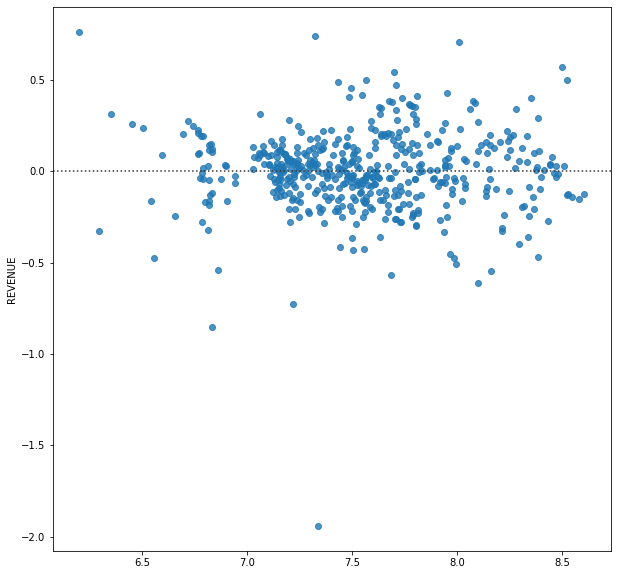

In [37]:
# setting figure size
fig, ax = plt.subplots(figsize = (10, 10))


# developing a residual plot
sns.residplot(x = gbt_pred,   # <-------------Can be quickly swapped out for other models
              y = y_test)     # actual values


# saving figure in working directory
plt.savefig("Chef Residual Plot.png")


# displaying the plot
plt.show()

Using the gradient boost model and plotting the residuals we see that prediction errors are for the most part, fairly even and random across the modelling space. However we do notice that larger values the residuals begin to fan out indicating that there is still room to fine tune the model 

<h2> Investigating final features </h2>

In [38]:
##Investingating which features are most 


feature = []
coef_model = []

for feat, importance_model in zip(x_variables, gbt.feature_importances_):
    feature.append(feat)
    coef_model.append(importance_model)
    
feature_df = pd.DataFrame ({'feature': feature,
                           'feature_importance': coef_model})

feature_df = feature_df.sort_values('feature_importance')

print(feature_df)

                            feature  feature_importance
14         out_AVG_CLICKS_PER_VISIT            0.000000
11                    out_PC_LOGINS            0.000000
17                out_AVG_MEAL_SIZE            0.000024
13      out_MASTER_CLASSES_ATTENDED            0.000059
15          out_TOTAL_PHOTOS_VIEWED            0.000241
12            out_AVG_PREP_VID_TIME            0.000268
4                LARGEST_ORDER_SIZE            0.002035
7              AVG_CLICKS_PER_VISIT            0.005095
9           out_TOTAL_MEALS_ORDERED            0.006088
10  out_CONTACTS_W_CUSTOMER_SERVICE            0.007773
8               TOTAL_PHOTOS_VIEWED            0.017842
16                    AVG_MEAL_SIZE            0.033972
5           MASTER_CLASSES_ATTENDED            0.034073
2       CONTACTS_W_CUSTOMER_SERVICE            0.070121
1                UNIQUE_MEALS_PURCH            0.100534
6                MEDIAN_MEAL_RATING            0.192526
0               TOTAL_MEALS_ORDERED            0

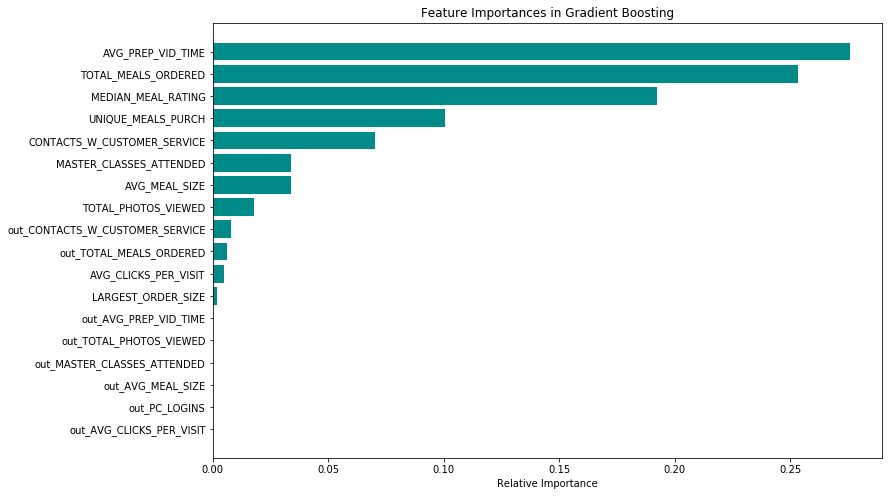

In [39]:
plt.figure(figsize=(12,8))
features = X_train.columns
importances = gbt.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances in Gradient Boosting')
plt.barh(range(len(indices)), importances[indices], color='darkcyan', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

It seems as though gradient boosting regressor left out many features. In the future I may experiment removing these variables and testing out several other models as well